In [32]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline

In [33]:
data = pd.read_csv('bank.csv')
print(data.head())
print('\n')
print(f'data shape: {data.shape}')

   age         job  marital  education default  balance housing loan  contact  \
0   59      admin.  married  secondary      no     2343     yes   no  unknown   
1   56      admin.  married  secondary      no       45      no   no  unknown   
2   41  technician  married  secondary      no     1270     yes   no  unknown   
3   55    services  married  secondary      no     2476     yes   no  unknown   
4   54      admin.  married   tertiary      no      184      no   no  unknown   

   day month  duration  campaign  pdays  previous poutcome deposit  
0    5   may      1042         1     -1         0  unknown     yes  
1    5   may      1467         1     -1         0  unknown     yes  
2    5   may      1389         1     -1         0  unknown     yes  
3    5   may       579         1     -1         0  unknown     yes  
4    5   may       673         2     -1         0  unknown     yes  


data shape: (11162, 17)


In [34]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11162 non-null  int64 
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  int64 
 14  previous   11162 non-null  int64 
 15  poutcome   11162 non-null  object
 16  deposit    11162 non-null  object
dtypes: int64(7), object(10)
memory usage: 1.4+ MB


In [35]:
bins = list(range(15, 100, 5))  # Starting from 15, ending at 100, with a step of 5

# Create a new column 'age_group' with the corresponding bin labels
data['age_group'] = pd.cut(data['age'], bins=bins, right=False, include_lowest=True)
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit,age_group
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes,"[55, 60)"
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes,"[55, 60)"
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes,"[40, 45)"
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes,"[55, 60)"
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes,"[50, 55)"


In [36]:
age_group_counts = data['age_group'].value_counts().sort_index()
age_group_counts

[15, 20)      21
[20, 25)     261
[25, 30)    1269
[30, 35)    2359
[35, 40)    1959
[40, 45)    1407
[45, 50)    1221
[50, 55)     984
[55, 60)     901
[60, 65)     355
[65, 70)     129
[70, 75)     125
[75, 80)      99
[80, 85)      48
[85, 90)      17
[90, 95)       6
Name: age_group, dtype: int64

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 [Text(0, 0, '[15, 20)'),
  Text(1, 0, '[20, 25)'),
  Text(2, 0, '[25, 30)'),
  Text(3, 0, '[30, 35)'),
  Text(4, 0, '[35, 40)'),
  Text(5, 0, '[40, 45)'),
  Text(6, 0, '[45, 50)'),
  Text(7, 0, '[50, 55)'),
  Text(8, 0, '[55, 60)'),
  Text(9, 0, '[60, 65)'),
  Text(10, 0, '[65, 70)'),
  Text(11, 0, '[70, 75)'),
  Text(12, 0, '[75, 80)'),
  Text(13, 0, '[80, 85)'),
  Text(14, 0, '[85, 90)'),
  Text(15, 0, '[90, 95)')])

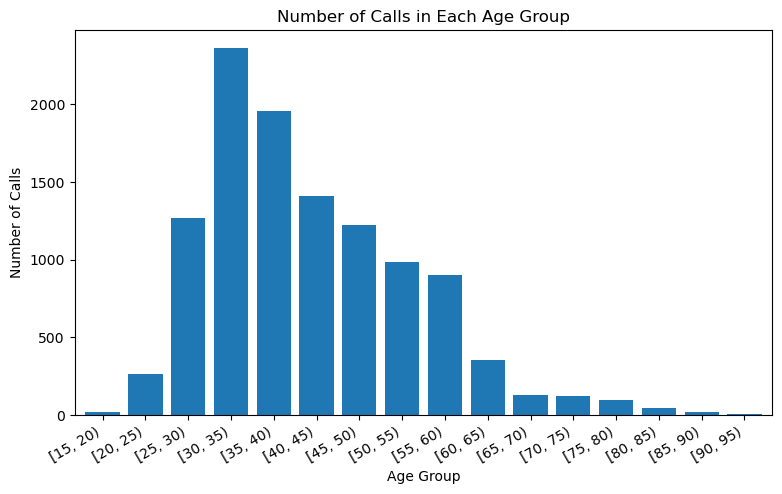

In [37]:
# Plot the bar graph
plt.figure(figsize=(9, 5))
age_group_counts.plot(kind='bar', width=0.8)

plt.xlabel('Age Group')
plt.ylabel('Number of Calls')
plt.title('Number of Calls in Each Age Group')
plt.xticks(rotation=30, ha='right')

In [47]:
data_age = data[data['deposit'] == 'yes']
data_age.shape

(5289, 18)

In [49]:
data_age['age_group'] = pd.cut(data_age['age'], bins=bins, right=False, include_lowest=True)

# Count the number of rows in each age group
age_group_counts = data_age['age_group'].value_counts().sort_index()
age_group_counts

C:\Users\srinadh\AppData\Local\Temp\ipykernel_27864\559345748.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_age['age_group'] = pd.cut(data_age['age'], bins=bins, right=False, include_lowest=True)


[15, 20)      18
[20, 25)     189
[25, 30)     721
[30, 35)    1052
[35, 40)     861
[40, 45)     543
[45, 50)     520
[50, 55)     403
[55, 60)     382
[60, 65)     259
[65, 70)     106
[70, 75)     103
[75, 80)      77
[80, 85)      37
[85, 90)      11
[90, 95)       6
Name: age_group, dtype: int64

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 [Text(0, 0, '[15, 20)'),
  Text(1, 0, '[20, 25)'),
  Text(2, 0, '[25, 30)'),
  Text(3, 0, '[30, 35)'),
  Text(4, 0, '[35, 40)'),
  Text(5, 0, '[40, 45)'),
  Text(6, 0, '[45, 50)'),
  Text(7, 0, '[50, 55)'),
  Text(8, 0, '[55, 60)'),
  Text(9, 0, '[60, 65)'),
  Text(10, 0, '[65, 70)'),
  Text(11, 0, '[70, 75)'),
  Text(12, 0, '[75, 80)'),
  Text(13, 0, '[80, 85)'),
  Text(14, 0, '[85, 90)'),
  Text(15, 0, '[90, 95)')])

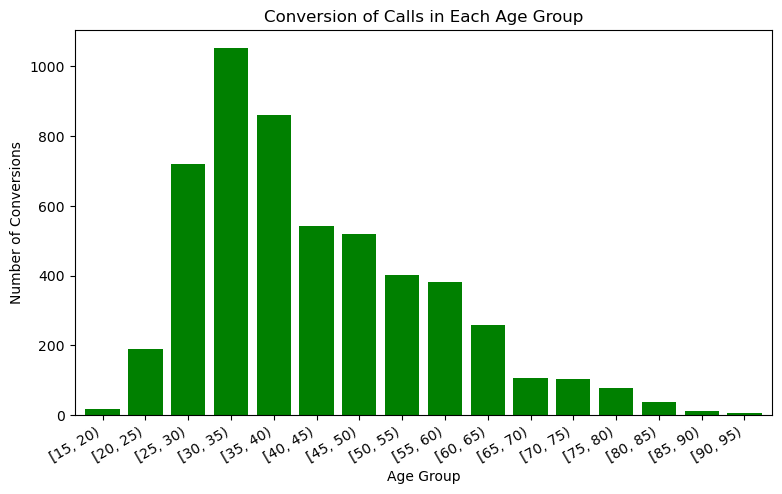

In [50]:
plt.figure(figsize=(9, 5))
age_group_counts.plot(kind='bar', width=0.8, color='g')

plt.xlabel('Age Group')
plt.ylabel('Number of Conversions')
plt.title('Conversion of Calls in Each Age Group')
plt.xticks(rotation=30, ha='right')

In [42]:
job_graph = data['job'].value_counts().to_frame().reset_index()

job_graph

,index,job
0,management,2566
1,blue-collar,1944
2,technician,1823
3,admin.,1334
4,services,923
5,retired,778
6,self-employed,405
7,student,360
8,unemployed,357
9,entrepreneur,328


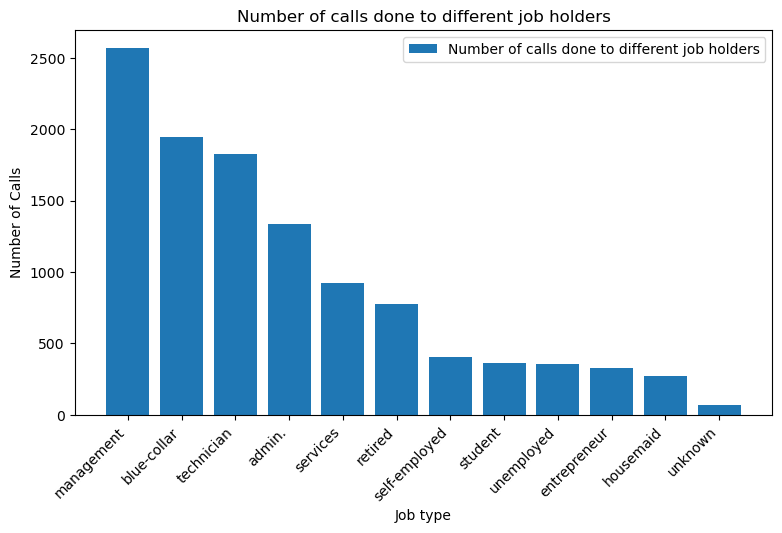

In [45]:
plt.figure(figsize=(9, 5))
#plt.bar(count_ones_zeros['Activity_Tile'], count_ones_zeros['Count_Ones'], label='Count of Ones', alpha=0.7)
plt.bar(job_graph['index'], job_graph['job'], label='Number of calls done to different job holders')
plt.xlabel('Job type')
plt.xticks(rotation=45, ha='right')
plt.ylabel('Number of Calls')
plt.title('Number of calls done to different job holders')
plt.legend()
plt.show()

In [53]:
dj = data[data['deposit'] == 'yes']
job_graph_yes = dj['job'].value_counts().to_frame().reset_index()
job_graph_yes

,index,job
0,management,1301
1,technician,840
2,blue-collar,708
3,admin.,631
4,retired,516
5,services,369
6,student,269
7,unemployed,202
8,self-employed,187
9,entrepreneur,123


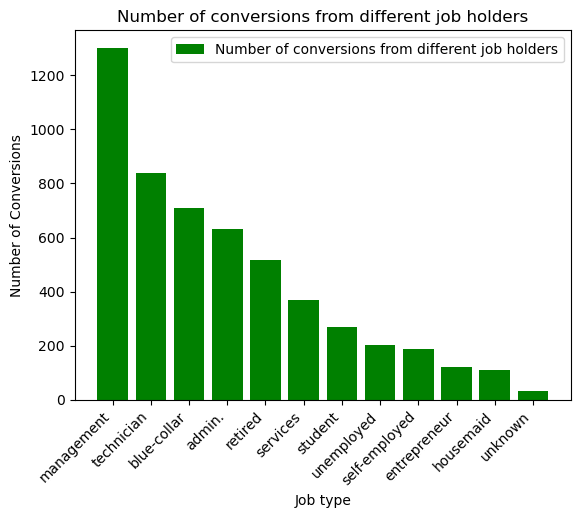

In [56]:
plt.bar(job_graph_yes['index'], job_graph_yes['job'], label='Number of conversions from different job holders', color = 'g')
plt.xlabel('Job type')
plt.xticks(rotation=45, ha='right')
plt.ylabel('Number of Conversions')
plt.title('Number of conversions from different job holders')
plt.legend()
plt.show()

Text(0.5, 1.0, 'Count of Customers in Each Job Category with Hue Encoding for Joining')

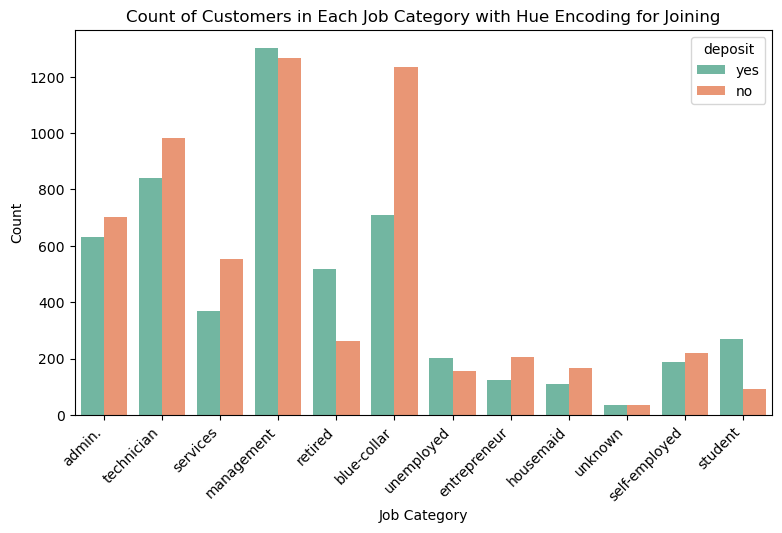

In [57]:
plt.figure(figsize=(9, 5))
sns.countplot(x='job', hue='deposit', data=data, palette='Set2')

plt.xlabel('Job Category')
plt.xticks(rotation=45, ha='right')
plt.ylabel('Count')
plt.title('Count of Customers in Each Job Category with Hue Encoding for Joining')

In [60]:
# Calculate the percentage of 'Yes' and 'No' for each job category
percentage_df = data.groupby(['job', 'deposit']).size().unstack().div(data.groupby('job').size(), axis=0) * 100
percentage_df

deposit,no,yes
job,,
admin.,52.698651,47.301349
blue-collar,63.580247,36.419753
entrepreneur,62.500000,37.500000
housemaid,60.218978,39.781022
management,49.298519,50.701481
retired,33.676093,66.323907
self-employed,53.827160,46.172840
services,60.021668,39.978332
student,25.277778,74.722222


<Figure size 1000x600 with 0 Axes>

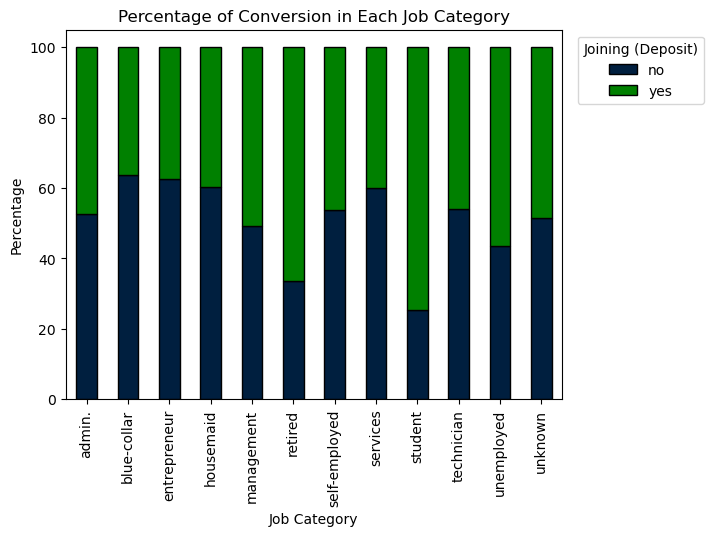

In [71]:
plt.figure(figsize=(10, 6))
colors = ['#001F3F', 'g']
percentage_df.plot(kind='bar', stacked=True, color = colors, edgecolor='black')

plt.xlabel('Job Category')
plt.ylabel('Percentage')
plt.title('Percentage of Conversion in Each Job Category')

plt.legend(title='Joining (Deposit)', loc='upper right', bbox_to_anchor=(1.3, 1))

In [68]:
count_df = data.groupby(['education', 'deposit']).size().unstack().fillna(0)
count_df

deposit,no,yes
education,,
primary,909,591
secondary,3026,2450
tertiary,1693,1996
unknown,245,252


<Figure size 900x500 with 0 Axes>

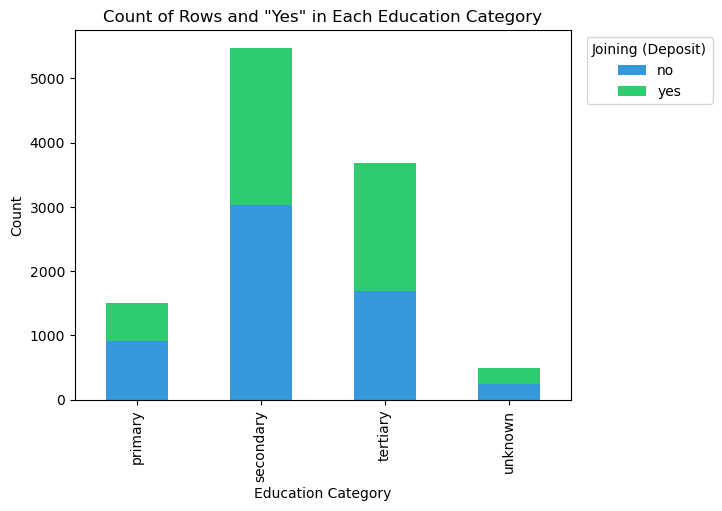

In [69]:
plt.figure(figsize=(9, 5))
count_df.plot(kind='bar', stacked=True, color=['#3498db', '#2ecc71'])

plt.xlabel('Education Category')
plt.ylabel('Count')
plt.title('Count of Rows and "Yes" in Each Education Category')

plt.legend(title='Joining (Deposit)', loc='upper right', bbox_to_anchor=(1.3, 1))

<Figure size 900x500 with 0 Axes>

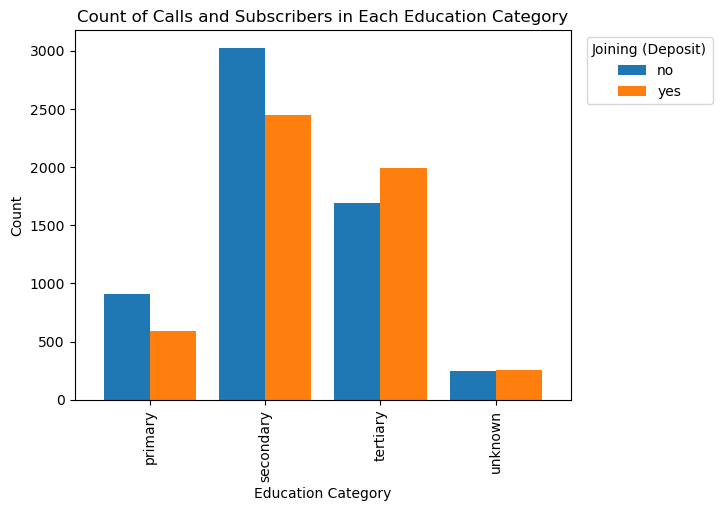

In [70]:
plt.figure(figsize=(9, 5))
count_df.plot(kind='bar', width=0.8)

plt.xlabel('Education Category')
plt.ylabel('Count')
plt.title('Count of Calls and Subscribers in Each Education Category')

plt.legend(title='Joining (Deposit)', loc='upper right', bbox_to_anchor=(1.3, 1))

Text(0.5, 1.0, 'Pie Chart for "Yes" and "No" Counts')

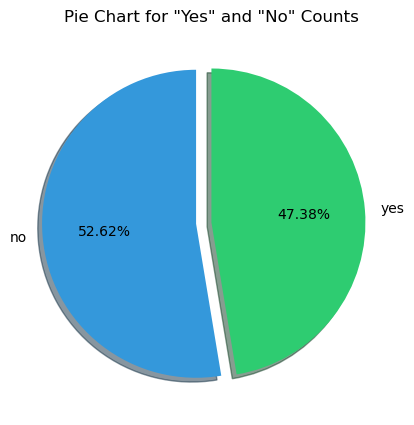

In [73]:
count_df = data['deposit'].value_counts()

# Create a pie chart with two separate slices
explode = [0.1, 0]  # Separating the first slice
colors = ['#3498db', '#2ecc71']
labels = count_df.index
sizes = count_df.values

plt.figure(figsize=(5, 5))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.2f%%', startangle=90, shadow=True)
plt.title('Pie Chart for "Yes" and "No" Counts')

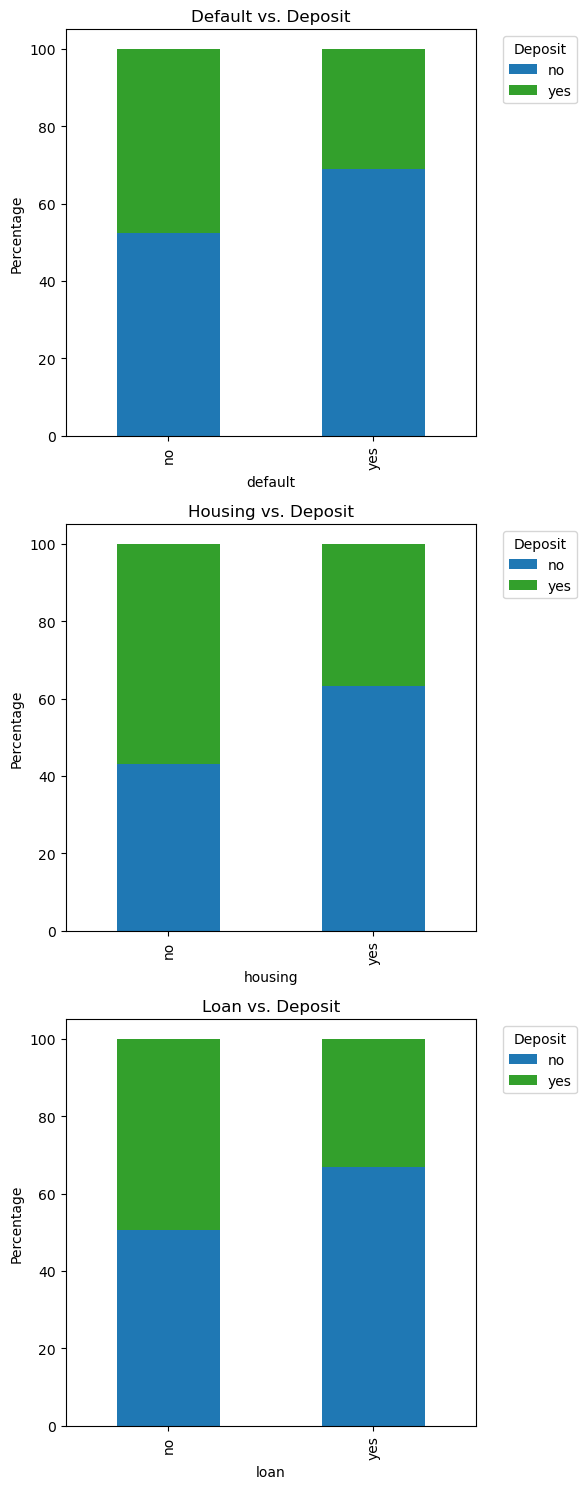

In [75]:
# Set color palette for PowerPoint-friendly colors
ppt_colors = ['#1f78b4', '#33a02c']

# Create subplots for 'default', 'housing', and 'loan'
fig, axes = plt.subplots(3, 1, figsize=(6, 15))

# Function to plot percentage bars with 'yes' and 'no' side by side
def plot_percentage_bars(category, ax):
    percentage_data = data.groupby(category)['deposit'].value_counts(normalize=True).unstack() * 100
    percentage_data.plot(kind='bar', stacked=True, color=ppt_colors, ax=ax)
    ax.set_title(f'{category.capitalize()} vs. Deposit')
    ax.set_ylabel('Percentage')
    ax.legend(title='Deposit', bbox_to_anchor=(1.05, 1), loc='upper left')
    

# Plot for 'default'
plot_percentage_bars('default', axes[0])

# Plot for 'housing'
plot_percentage_bars('housing', axes[1])

# Plot for 'loan'
plot_percentage_bars('loan', axes[2])

plt.tight_layout()

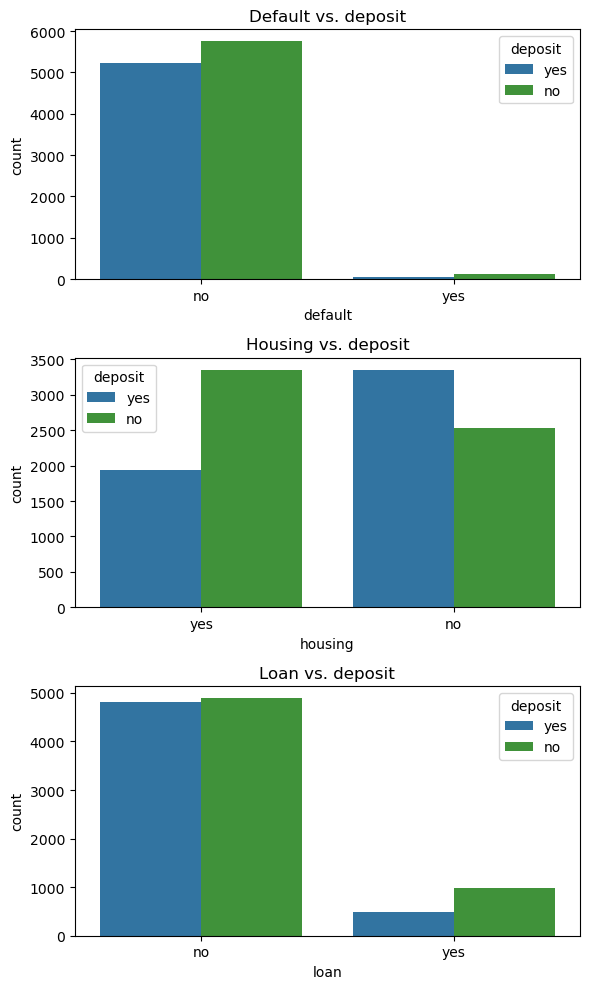

In [77]:
fig, axes = plt.subplots(3, 1, figsize=(6, 10))

# Set color palette for PowerPoint-friendly colors
ppt_colors = ['#1f78b4', '#33a02c']

# Bar plot for 'default' with 'deposit' as hue
sns.countplot(x='default', hue='deposit', data=data, palette=ppt_colors, ax=axes[0])
axes[0].set_title('Default vs. deposit')

# Bar plot for 'housing' with 'deposit' as hue
sns.countplot(x='housing', hue='deposit', data=data, palette=ppt_colors, ax=axes[1])
axes[1].set_title('Housing vs. deposit')

# Bar plot for 'loan' with 'deposit' as hue
sns.countplot(x='loan', hue='deposit', data=data, palette=ppt_colors, ax=axes[2])
axes[2].set_title('Loan vs. deposit')

plt.tight_layout()

In [78]:
data['balance'].value_counts()

 0       774
 1        39
 3        35
 2        34
 4        29
        ... 
 5517      1
 8332      1
 4859      1
-267       1
-134       1
Name: balance, Length: 3805, dtype: int64

Text(0.5, 1.0, 'Box Plot of Bank Balance for Different Values of Y')

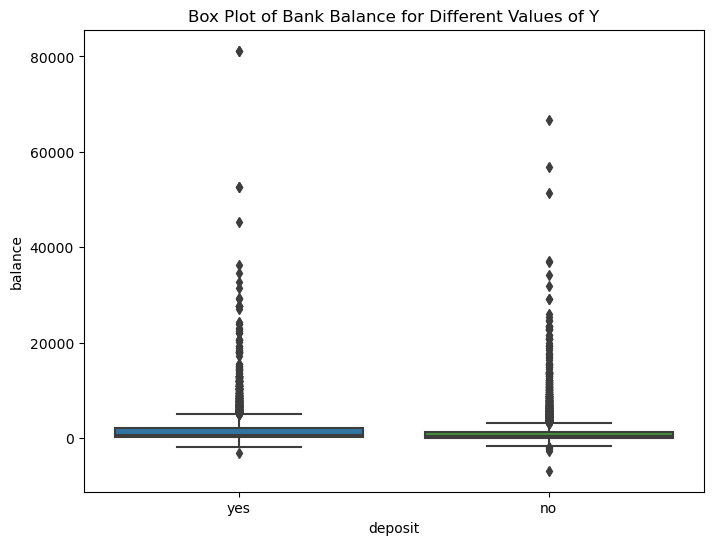

In [79]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='deposit', y='balance', data=data, palette=['#1f78b4', '#33a02c'])
plt.title('Box Plot of Bank Balance for Different Values of Y')

Text(0, 0.5, 'Bank Balance')

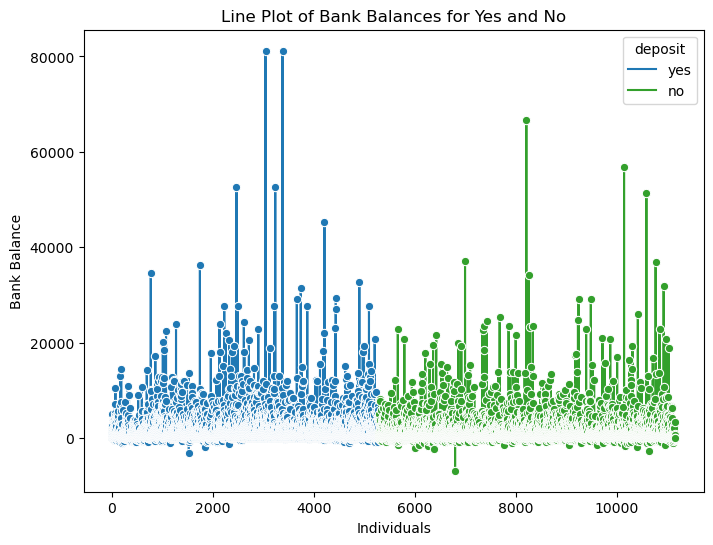

In [80]:
plt.figure(figsize=(8, 6))
sns.lineplot(x=data.index, y='balance', hue='deposit', data=data, marker='o', palette=['#1f78b4', '#33a02c'])
plt.title('Line Plot of Bank Balances for Yes and No')
plt.xlabel('Individuals')
plt.ylabel('Bank Balance')

Text(0, 0.5, 'Bank Balance')

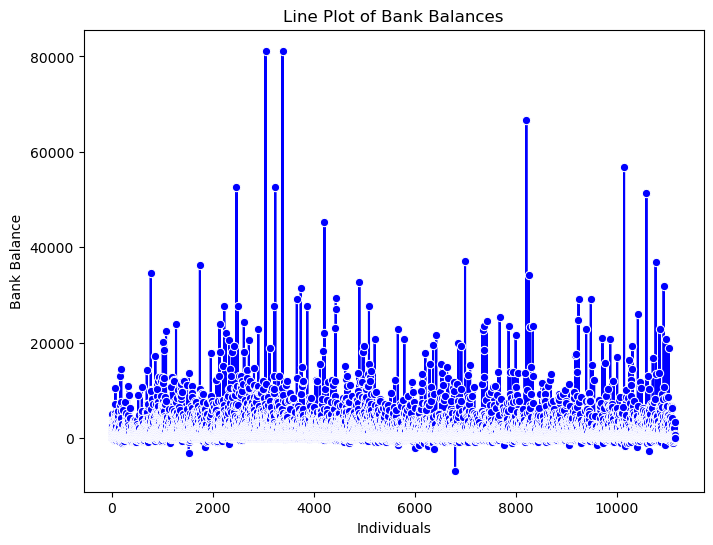

In [81]:
plt.figure(figsize=(8, 6))
sns.lineplot(x=data.index, y='balance', data=data, marker='o', color='blue')
plt.title('Line Plot of Bank Balances')
plt.xlabel('Individuals')
plt.ylabel('Bank Balance')

Text(0.5, 1.0, 'Bank Balance for Records with Y = Yes')

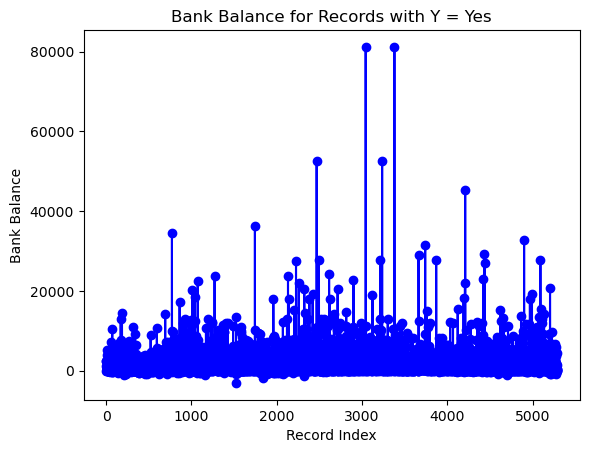

In [82]:
# Filter the DataFrame to include only records where 'Y' is 'Yes'
df_yes = data[data['deposit'] == 'yes']

# Plotting the line graph
plt.plot(df_yes['balance'], marker='o', linestyle='-', color='b', label='Deposit = Yes')

# Adding labels and title
plt.xlabel('Record Index')
plt.ylabel('Bank Balance')
plt.title('Bank Balance for Records with Y = Yes')

In [86]:
# Convert 'y' values to numeric for plotting
data['y_numeric'] = pd.Categorical(data['deposit']).codes
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit,age_group,y_numeric
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes,"[55, 60)",1
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes,"[55, 60)",1
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes,"[40, 45)",1
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes,"[55, 60)",1
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes,"[50, 55)",1


Text(0.5, 1.0, 'Scatter Plot of Balance with Respect to Y')

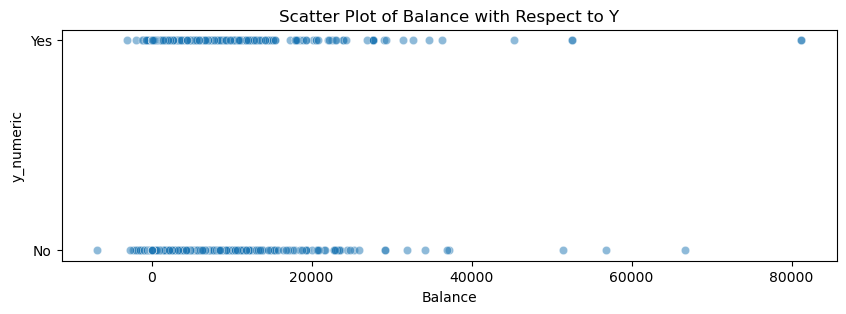

In [88]:
plt.figure(figsize=(10, 3))
sns.scatterplot(x='balance', y='y_numeric', data=data, alpha=0.5)
plt.yticks([0, 1], ['No', 'Yes'])  # Labeling y-axis ticks
plt.xlabel('Balance')
plt.title('Scatter Plot of Balance with Respect to Y')

Text(0.5, 1.0, 'Violin Plot of Balance with Respect to Deposit')

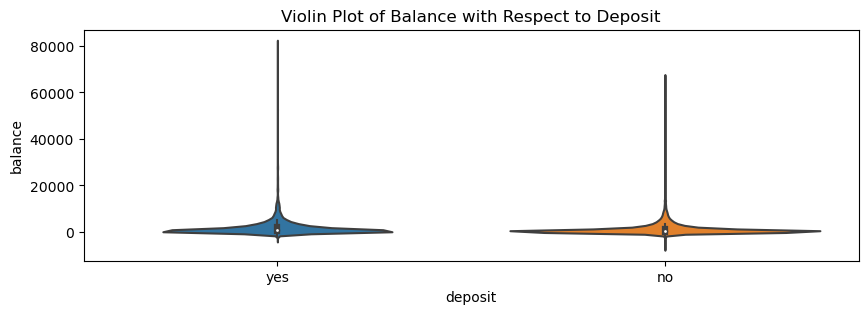

In [91]:
plt.figure(figsize=(10, 3))
sns.violinplot(x='deposit', y='balance', data=data)
plt.xlabel('deposit')
plt.ylabel('balance')
plt.title('Violin Plot of Balance with Respect to Deposit')

Text(0.5, 1.0, 'Heatmap of Balance with Respect to Deposit')

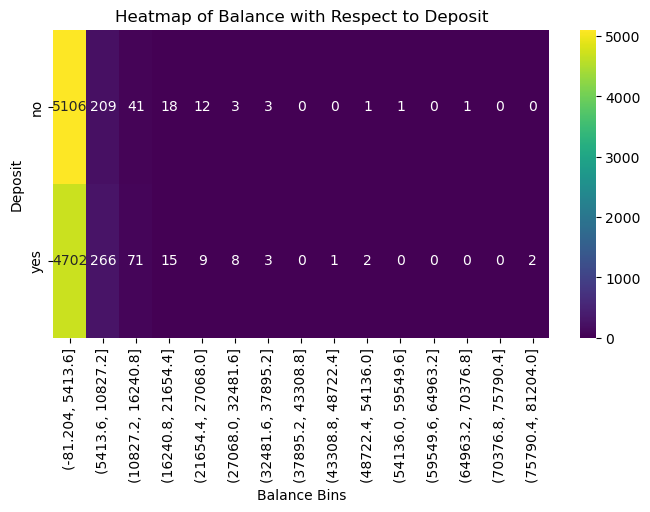

In [93]:
df = data[data['balance'] >= 0]
# Create a heatmap
plt.figure(figsize=(8, 4))
heatmap_data = df.groupby(['deposit', pd.cut(df['balance'], bins=15)]).size().unstack().fillna(0)
sns.heatmap(heatmap_data, annot=True, fmt='g', cmap='viridis')
plt.xlabel('Balance Bins')
plt.ylabel('Deposit')
plt.title('Heatmap of Balance with Respect to Deposit')